In [1]:
import warnings
warnings.filterwarnings("ignore") 

In [2]:
import pandas as pd 
df=pd.read_csv('C:\\workplace\\power-consumption\\dataset\\processed.csv',index_col=0)
df.head()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption
Datetime,,,,,,
2017-01-01 00:00,6.196833,75.066667,0.081833,0.063500,0.098833,22158.923532
2017-01-01 01:00,5.548833,77.583333,0.082000,0.056833,0.112500,19259.508737
2017-01-01 02:00,5.054333,78.933333,0.082333,0.063000,0.129167,17363.293880
2017-01-01 03:00,5.004333,77.083333,0.082833,0.059833,0.141000,16304.815849
2017-01-01 04:00,5.097667,74.050000,0.082333,0.058000,0.122833,15904.879449


In [3]:
df.reset_index(inplace=True)
df.columns=['ds', 'Temperature', 'Humidity', 'WindSpeed','GeneralDiffuseFlows', 'DiffuseFlows', 'y']
df['ds']=pd.to_datetime(df['ds'])
df.head()

,ds,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,y
0,2017-01-01 00:00:00,6.196833,75.066667,0.081833,0.063500,0.098833,22158.923532
1,2017-01-01 01:00:00,5.548833,77.583333,0.082000,0.056833,0.112500,19259.508737
2,2017-01-01 02:00:00,5.054333,78.933333,0.082333,0.063000,0.129167,17363.293880
3,2017-01-01 03:00:00,5.004333,77.083333,0.082833,0.059833,0.141000,16304.815849
4,2017-01-01 04:00:00,5.097667,74.050000,0.082333,0.058000,0.122833,15904.879449


In [6]:
import prophet 

In [16]:
triggered_times=df.loc[(df['ds']>='2017-07-28 00:00') & (df['ds'].dt.hour==0),'ds'].dt.strftime('%Y-%m-%d 00:00:00')
triggered_times

4992    2017-07-28 00:00:00
5016    2017-07-29 00:00:00
5040    2017-07-30 00:00:00
5064    2017-07-31 00:00:00
5088    2017-08-01 00:00:00
               ...         
8616    2017-12-26 00:00:00
8640    2017-12-27 00:00:00
8664    2017-12-28 00:00:00
8688    2017-12-29 00:00:00
8712    2017-12-30 00:00:00
Name: ds, Length: 156, dtype: object

In [30]:
pred_df=pd.DataFrame(columns=['forecast'])
for date_time in triggered_times:
    temp_train_df=df[df['ds']<=date_time]
    temp_test_df=df[df['ds']>date_time].head(24)
    
    model=prophet.Prophet(daily_seasonality=True, weekly_seasonality=True)
    model.add_regressor('Temperature')
    model.add_regressor('Humidity')
    model.add_regressor('WindSpeed')
    model.add_regressor('GeneralDiffuseFlows')
    model.add_regressor('DiffuseFlows')
    model.fit(temp_train_df)
    temp_test_df.drop('y',axis=1)
    pred=model.predict(temp_test_df)
    pred_df=pd.concat([pred_df,pred])
    print(date_time)

18:33:58 - cmdstanpy - INFO - Chain [1] start processing
18:33:59 - cmdstanpy - INFO - Chain [1] done processing


2017-07-28 00:00:00


18:34:00 - cmdstanpy - INFO - Chain [1] start processing
18:34:01 - cmdstanpy - INFO - Chain [1] done processing


2017-07-29 00:00:00


18:34:02 - cmdstanpy - INFO - Chain [1] start processing
18:34:03 - cmdstanpy - INFO - Chain [1] done processing


2017-07-30 00:00:00


18:34:04 - cmdstanpy - INFO - Chain [1] start processing
18:34:05 - cmdstanpy - INFO - Chain [1] done processing


2017-07-31 00:00:00


18:34:05 - cmdstanpy - INFO - Chain [1] start processing
18:34:06 - cmdstanpy - INFO - Chain [1] done processing


2017-08-01 00:00:00


18:34:07 - cmdstanpy - INFO - Chain [1] start processing
18:34:08 - cmdstanpy - INFO - Chain [1] done processing


2017-08-02 00:00:00


18:34:08 - cmdstanpy - INFO - Chain [1] start processing
18:34:09 - cmdstanpy - INFO - Chain [1] done processing


2017-08-03 00:00:00


18:34:10 - cmdstanpy - INFO - Chain [1] start processing
18:34:11 - cmdstanpy - INFO - Chain [1] done processing


2017-08-04 00:00:00


18:34:12 - cmdstanpy - INFO - Chain [1] start processing
18:34:13 - cmdstanpy - INFO - Chain [1] done processing


2017-08-05 00:00:00


18:34:13 - cmdstanpy - INFO - Chain [1] start processing
18:34:14 - cmdstanpy - INFO - Chain [1] done processing


2017-08-06 00:00:00


18:34:15 - cmdstanpy - INFO - Chain [1] start processing
18:34:15 - cmdstanpy - INFO - Chain [1] done processing


2017-08-07 00:00:00


18:34:16 - cmdstanpy - INFO - Chain [1] start processing
18:34:17 - cmdstanpy - INFO - Chain [1] done processing


2017-08-08 00:00:00


18:34:18 - cmdstanpy - INFO - Chain [1] start processing
18:34:19 - cmdstanpy - INFO - Chain [1] done processing


2017-08-09 00:00:00


18:34:19 - cmdstanpy - INFO - Chain [1] start processing
18:34:21 - cmdstanpy - INFO - Chain [1] done processing


2017-08-10 00:00:00


18:34:21 - cmdstanpy - INFO - Chain [1] start processing
18:34:22 - cmdstanpy - INFO - Chain [1] done processing


2017-08-11 00:00:00


18:34:23 - cmdstanpy - INFO - Chain [1] start processing
18:34:25 - cmdstanpy - INFO - Chain [1] done processing


2017-08-12 00:00:00


18:34:25 - cmdstanpy - INFO - Chain [1] start processing
18:34:27 - cmdstanpy - INFO - Chain [1] done processing


2017-08-13 00:00:00


18:34:27 - cmdstanpy - INFO - Chain [1] start processing
18:34:29 - cmdstanpy - INFO - Chain [1] done processing


2017-08-14 00:00:00


18:34:30 - cmdstanpy - INFO - Chain [1] start processing
18:34:30 - cmdstanpy - INFO - Chain [1] done processing


2017-08-15 00:00:00


18:34:31 - cmdstanpy - INFO - Chain [1] start processing
18:34:32 - cmdstanpy - INFO - Chain [1] done processing


2017-08-16 00:00:00


18:34:33 - cmdstanpy - INFO - Chain [1] start processing
18:34:34 - cmdstanpy - INFO - Chain [1] done processing


2017-08-17 00:00:00


18:34:34 - cmdstanpy - INFO - Chain [1] start processing
18:34:36 - cmdstanpy - INFO - Chain [1] done processing


2017-08-18 00:00:00


18:34:36 - cmdstanpy - INFO - Chain [1] start processing
18:34:38 - cmdstanpy - INFO - Chain [1] done processing


2017-08-19 00:00:00


18:34:38 - cmdstanpy - INFO - Chain [1] start processing
18:34:40 - cmdstanpy - INFO - Chain [1] done processing


2017-08-20 00:00:00


18:34:41 - cmdstanpy - INFO - Chain [1] start processing
18:34:43 - cmdstanpy - INFO - Chain [1] done processing


2017-08-21 00:00:00


18:34:44 - cmdstanpy - INFO - Chain [1] start processing
18:34:46 - cmdstanpy - INFO - Chain [1] done processing


2017-08-22 00:00:00


18:34:47 - cmdstanpy - INFO - Chain [1] start processing
18:34:50 - cmdstanpy - INFO - Chain [1] done processing


2017-08-23 00:00:00


18:34:50 - cmdstanpy - INFO - Chain [1] start processing
18:34:55 - cmdstanpy - INFO - Chain [1] done processing


2017-08-24 00:00:00


18:34:57 - cmdstanpy - INFO - Chain [1] start processing
18:35:00 - cmdstanpy - INFO - Chain [1] done processing


2017-08-25 00:00:00


18:35:01 - cmdstanpy - INFO - Chain [1] start processing
18:35:11 - cmdstanpy - INFO - Chain [1] done processing


2017-08-26 00:00:00


18:35:12 - cmdstanpy - INFO - Chain [1] start processing
18:35:19 - cmdstanpy - INFO - Chain [1] done processing


2017-08-27 00:00:00


18:35:20 - cmdstanpy - INFO - Chain [1] start processing
18:35:25 - cmdstanpy - INFO - Chain [1] done processing


2017-08-28 00:00:00


18:35:25 - cmdstanpy - INFO - Chain [1] start processing
18:35:28 - cmdstanpy - INFO - Chain [1] done processing


2017-08-29 00:00:00


18:35:30 - cmdstanpy - INFO - Chain [1] start processing
18:35:34 - cmdstanpy - INFO - Chain [1] done processing


2017-08-30 00:00:00


18:35:36 - cmdstanpy - INFO - Chain [1] start processing
18:35:41 - cmdstanpy - INFO - Chain [1] done processing


2017-08-31 00:00:00


18:35:42 - cmdstanpy - INFO - Chain [1] start processing
18:35:46 - cmdstanpy - INFO - Chain [1] done processing


2017-09-01 00:00:00


18:35:47 - cmdstanpy - INFO - Chain [1] start processing
18:35:52 - cmdstanpy - INFO - Chain [1] done processing


2017-09-02 00:00:00


18:35:54 - cmdstanpy - INFO - Chain [1] start processing
18:35:57 - cmdstanpy - INFO - Chain [1] done processing


2017-09-03 00:00:00


18:35:58 - cmdstanpy - INFO - Chain [1] start processing
18:36:01 - cmdstanpy - INFO - Chain [1] done processing


2017-09-04 00:00:00


18:36:02 - cmdstanpy - INFO - Chain [1] start processing
18:36:05 - cmdstanpy - INFO - Chain [1] done processing


2017-09-05 00:00:00


18:36:06 - cmdstanpy - INFO - Chain [1] start processing
18:36:10 - cmdstanpy - INFO - Chain [1] done processing


2017-09-06 00:00:00


18:36:11 - cmdstanpy - INFO - Chain [1] start processing
18:36:15 - cmdstanpy - INFO - Chain [1] done processing


2017-09-07 00:00:00


18:36:16 - cmdstanpy - INFO - Chain [1] start processing
18:36:20 - cmdstanpy - INFO - Chain [1] done processing


2017-09-08 00:00:00


18:36:22 - cmdstanpy - INFO - Chain [1] start processing
18:36:25 - cmdstanpy - INFO - Chain [1] done processing


2017-09-09 00:00:00


18:36:26 - cmdstanpy - INFO - Chain [1] start processing
18:36:29 - cmdstanpy - INFO - Chain [1] done processing


2017-09-10 00:00:00


18:36:30 - cmdstanpy - INFO - Chain [1] start processing
18:36:33 - cmdstanpy - INFO - Chain [1] done processing


2017-09-11 00:00:00


18:36:34 - cmdstanpy - INFO - Chain [1] start processing
18:36:35 - cmdstanpy - INFO - Chain [1] done processing


2017-09-12 00:00:00


18:36:36 - cmdstanpy - INFO - Chain [1] start processing
18:36:37 - cmdstanpy - INFO - Chain [1] done processing


2017-09-13 00:00:00


18:36:38 - cmdstanpy - INFO - Chain [1] start processing
18:36:40 - cmdstanpy - INFO - Chain [1] done processing


2017-09-14 00:00:00


18:36:40 - cmdstanpy - INFO - Chain [1] start processing
18:36:43 - cmdstanpy - INFO - Chain [1] done processing


2017-09-15 00:00:00


18:36:43 - cmdstanpy - INFO - Chain [1] start processing
18:36:45 - cmdstanpy - INFO - Chain [1] done processing


2017-09-16 00:00:00


18:36:46 - cmdstanpy - INFO - Chain [1] start processing
18:36:48 - cmdstanpy - INFO - Chain [1] done processing


2017-09-17 00:00:00


18:36:48 - cmdstanpy - INFO - Chain [1] start processing
18:36:50 - cmdstanpy - INFO - Chain [1] done processing


2017-09-18 00:00:00


18:36:51 - cmdstanpy - INFO - Chain [1] start processing
18:36:52 - cmdstanpy - INFO - Chain [1] done processing


2017-09-19 00:00:00


18:36:53 - cmdstanpy - INFO - Chain [1] start processing
18:36:55 - cmdstanpy - INFO - Chain [1] done processing


2017-09-20 00:00:00


18:36:55 - cmdstanpy - INFO - Chain [1] start processing
18:36:57 - cmdstanpy - INFO - Chain [1] done processing


2017-09-21 00:00:00


18:36:58 - cmdstanpy - INFO - Chain [1] start processing
18:36:59 - cmdstanpy - INFO - Chain [1] done processing


2017-09-22 00:00:00


18:37:00 - cmdstanpy - INFO - Chain [1] start processing
18:37:02 - cmdstanpy - INFO - Chain [1] done processing


2017-09-23 00:00:00


18:37:02 - cmdstanpy - INFO - Chain [1] start processing
18:37:05 - cmdstanpy - INFO - Chain [1] done processing


2017-09-24 00:00:00


18:37:05 - cmdstanpy - INFO - Chain [1] start processing
18:37:08 - cmdstanpy - INFO - Chain [1] done processing


2017-09-25 00:00:00


18:37:10 - cmdstanpy - INFO - Chain [1] start processing
18:37:13 - cmdstanpy - INFO - Chain [1] done processing


2017-09-26 00:00:00


18:37:15 - cmdstanpy - INFO - Chain [1] start processing
18:37:18 - cmdstanpy - INFO - Chain [1] done processing


2017-09-27 00:00:00


18:37:19 - cmdstanpy - INFO - Chain [1] start processing
18:37:24 - cmdstanpy - INFO - Chain [1] done processing


2017-09-28 00:00:00


18:37:25 - cmdstanpy - INFO - Chain [1] start processing
18:37:29 - cmdstanpy - INFO - Chain [1] done processing


2017-09-29 00:00:00


18:37:30 - cmdstanpy - INFO - Chain [1] start processing
18:37:34 - cmdstanpy - INFO - Chain [1] done processing


2017-09-30 00:00:00


18:37:36 - cmdstanpy - INFO - Chain [1] start processing
18:37:39 - cmdstanpy - INFO - Chain [1] done processing


2017-10-01 00:00:00


18:37:40 - cmdstanpy - INFO - Chain [1] start processing
18:37:44 - cmdstanpy - INFO - Chain [1] done processing


2017-10-02 00:00:00


18:37:45 - cmdstanpy - INFO - Chain [1] start processing
18:37:47 - cmdstanpy - INFO - Chain [1] done processing


2017-10-03 00:00:00


18:37:48 - cmdstanpy - INFO - Chain [1] start processing
18:37:50 - cmdstanpy - INFO - Chain [1] done processing


2017-10-04 00:00:00


18:37:51 - cmdstanpy - INFO - Chain [1] start processing
18:37:55 - cmdstanpy - INFO - Chain [1] done processing


2017-10-05 00:00:00


18:37:56 - cmdstanpy - INFO - Chain [1] start processing
18:38:00 - cmdstanpy - INFO - Chain [1] done processing


2017-10-06 00:00:00


18:38:01 - cmdstanpy - INFO - Chain [1] start processing
18:38:04 - cmdstanpy - INFO - Chain [1] done processing


2017-10-07 00:00:00


18:38:05 - cmdstanpy - INFO - Chain [1] start processing
18:38:08 - cmdstanpy - INFO - Chain [1] done processing


2017-10-08 00:00:00


18:38:09 - cmdstanpy - INFO - Chain [1] start processing
18:38:13 - cmdstanpy - INFO - Chain [1] done processing


2017-10-09 00:00:00


18:38:13 - cmdstanpy - INFO - Chain [1] start processing
18:38:16 - cmdstanpy - INFO - Chain [1] done processing


2017-10-10 00:00:00


18:38:17 - cmdstanpy - INFO - Chain [1] start processing
18:38:21 - cmdstanpy - INFO - Chain [1] done processing


2017-10-11 00:00:00


18:38:22 - cmdstanpy - INFO - Chain [1] start processing
18:38:25 - cmdstanpy - INFO - Chain [1] done processing


2017-10-12 00:00:00


18:38:26 - cmdstanpy - INFO - Chain [1] start processing
18:38:29 - cmdstanpy - INFO - Chain [1] done processing


2017-10-13 00:00:00


18:38:30 - cmdstanpy - INFO - Chain [1] start processing
18:38:34 - cmdstanpy - INFO - Chain [1] done processing


2017-10-14 00:00:00


18:38:36 - cmdstanpy - INFO - Chain [1] start processing
18:38:39 - cmdstanpy - INFO - Chain [1] done processing


2017-10-15 00:00:00


18:38:40 - cmdstanpy - INFO - Chain [1] start processing
18:38:44 - cmdstanpy - INFO - Chain [1] done processing


2017-10-16 00:00:00


18:38:45 - cmdstanpy - INFO - Chain [1] start processing
18:38:51 - cmdstanpy - INFO - Chain [1] done processing


2017-10-17 00:00:00


18:38:53 - cmdstanpy - INFO - Chain [1] start processing
18:38:59 - cmdstanpy - INFO - Chain [1] done processing


2017-10-18 00:00:00


18:38:59 - cmdstanpy - INFO - Chain [1] start processing
18:39:04 - cmdstanpy - INFO - Chain [1] done processing


2017-10-19 00:00:00


18:39:05 - cmdstanpy - INFO - Chain [1] start processing
18:39:11 - cmdstanpy - INFO - Chain [1] done processing


2017-10-20 00:00:00


18:39:11 - cmdstanpy - INFO - Chain [1] start processing
18:39:15 - cmdstanpy - INFO - Chain [1] done processing


2017-10-21 00:00:00


18:39:16 - cmdstanpy - INFO - Chain [1] start processing
18:39:20 - cmdstanpy - INFO - Chain [1] done processing


2017-10-22 00:00:00


18:39:21 - cmdstanpy - INFO - Chain [1] start processing
18:39:25 - cmdstanpy - INFO - Chain [1] done processing


2017-10-23 00:00:00


18:39:25 - cmdstanpy - INFO - Chain [1] start processing
18:39:30 - cmdstanpy - INFO - Chain [1] done processing


2017-10-24 00:00:00


18:39:30 - cmdstanpy - INFO - Chain [1] start processing
18:39:40 - cmdstanpy - INFO - Chain [1] done processing


2017-10-25 00:00:00


18:39:41 - cmdstanpy - INFO - Chain [1] start processing
18:39:47 - cmdstanpy - INFO - Chain [1] done processing


2017-10-26 00:00:00


18:39:48 - cmdstanpy - INFO - Chain [1] start processing
18:39:56 - cmdstanpy - INFO - Chain [1] done processing


2017-10-27 00:00:00


18:39:57 - cmdstanpy - INFO - Chain [1] start processing
18:40:03 - cmdstanpy - INFO - Chain [1] done processing


2017-10-28 00:00:00


18:40:04 - cmdstanpy - INFO - Chain [1] start processing
18:40:10 - cmdstanpy - INFO - Chain [1] done processing


2017-10-29 00:00:00


18:40:10 - cmdstanpy - INFO - Chain [1] start processing
18:40:15 - cmdstanpy - INFO - Chain [1] done processing


2017-10-30 00:00:00


18:40:16 - cmdstanpy - INFO - Chain [1] start processing
18:40:19 - cmdstanpy - INFO - Chain [1] done processing


2017-10-31 00:00:00


18:40:20 - cmdstanpy - INFO - Chain [1] start processing
18:40:24 - cmdstanpy - INFO - Chain [1] done processing


2017-11-01 00:00:00


18:40:24 - cmdstanpy - INFO - Chain [1] start processing
18:40:28 - cmdstanpy - INFO - Chain [1] done processing


2017-11-02 00:00:00


18:40:29 - cmdstanpy - INFO - Chain [1] start processing
18:40:32 - cmdstanpy - INFO - Chain [1] done processing


2017-11-03 00:00:00


18:40:33 - cmdstanpy - INFO - Chain [1] start processing
18:40:36 - cmdstanpy - INFO - Chain [1] done processing


2017-11-04 00:00:00


18:40:37 - cmdstanpy - INFO - Chain [1] start processing
18:40:41 - cmdstanpy - INFO - Chain [1] done processing


2017-11-05 00:00:00


18:40:41 - cmdstanpy - INFO - Chain [1] start processing
18:40:47 - cmdstanpy - INFO - Chain [1] done processing


2017-11-06 00:00:00


18:40:49 - cmdstanpy - INFO - Chain [1] start processing
18:40:55 - cmdstanpy - INFO - Chain [1] done processing


2017-11-07 00:00:00


18:40:56 - cmdstanpy - INFO - Chain [1] start processing
18:41:01 - cmdstanpy - INFO - Chain [1] done processing


2017-11-08 00:00:00


18:41:02 - cmdstanpy - INFO - Chain [1] start processing
18:41:07 - cmdstanpy - INFO - Chain [1] done processing


2017-11-09 00:00:00


18:41:09 - cmdstanpy - INFO - Chain [1] start processing
18:41:15 - cmdstanpy - INFO - Chain [1] done processing


2017-11-10 00:00:00


18:41:16 - cmdstanpy - INFO - Chain [1] start processing
18:41:20 - cmdstanpy - INFO - Chain [1] done processing


2017-11-11 00:00:00


18:41:20 - cmdstanpy - INFO - Chain [1] start processing
18:41:25 - cmdstanpy - INFO - Chain [1] done processing


2017-11-12 00:00:00


18:41:26 - cmdstanpy - INFO - Chain [1] start processing
18:41:30 - cmdstanpy - INFO - Chain [1] done processing


2017-11-13 00:00:00


18:41:31 - cmdstanpy - INFO - Chain [1] start processing
18:41:35 - cmdstanpy - INFO - Chain [1] done processing


2017-11-14 00:00:00


18:41:36 - cmdstanpy - INFO - Chain [1] start processing
18:41:40 - cmdstanpy - INFO - Chain [1] done processing


2017-11-15 00:00:00


18:41:41 - cmdstanpy - INFO - Chain [1] start processing
18:41:45 - cmdstanpy - INFO - Chain [1] done processing


2017-11-16 00:00:00


18:41:45 - cmdstanpy - INFO - Chain [1] start processing
18:41:49 - cmdstanpy - INFO - Chain [1] done processing


2017-11-17 00:00:00


18:41:50 - cmdstanpy - INFO - Chain [1] start processing
18:41:57 - cmdstanpy - INFO - Chain [1] done processing


2017-11-18 00:00:00


18:41:59 - cmdstanpy - INFO - Chain [1] start processing
18:42:07 - cmdstanpy - INFO - Chain [1] done processing


2017-11-19 00:00:00


18:42:08 - cmdstanpy - INFO - Chain [1] start processing
18:42:15 - cmdstanpy - INFO - Chain [1] done processing


2017-11-20 00:00:00


18:42:17 - cmdstanpy - INFO - Chain [1] start processing
18:42:21 - cmdstanpy - INFO - Chain [1] done processing


2017-11-21 00:00:00


18:42:22 - cmdstanpy - INFO - Chain [1] start processing
18:42:27 - cmdstanpy - INFO - Chain [1] done processing


2017-11-22 00:00:00


18:42:28 - cmdstanpy - INFO - Chain [1] start processing
18:42:31 - cmdstanpy - INFO - Chain [1] done processing


2017-11-23 00:00:00


18:42:32 - cmdstanpy - INFO - Chain [1] start processing
18:42:35 - cmdstanpy - INFO - Chain [1] done processing


2017-11-24 00:00:00


18:42:36 - cmdstanpy - INFO - Chain [1] start processing
18:42:40 - cmdstanpy - INFO - Chain [1] done processing


2017-11-25 00:00:00


18:42:40 - cmdstanpy - INFO - Chain [1] start processing
18:42:44 - cmdstanpy - INFO - Chain [1] done processing


2017-11-26 00:00:00


18:42:45 - cmdstanpy - INFO - Chain [1] start processing
18:42:49 - cmdstanpy - INFO - Chain [1] done processing


2017-11-27 00:00:00


18:42:49 - cmdstanpy - INFO - Chain [1] start processing
18:42:55 - cmdstanpy - INFO - Chain [1] done processing


2017-11-28 00:00:00


18:42:56 - cmdstanpy - INFO - Chain [1] start processing
18:43:01 - cmdstanpy - INFO - Chain [1] done processing


2017-11-29 00:00:00


18:43:02 - cmdstanpy - INFO - Chain [1] start processing
18:43:06 - cmdstanpy - INFO - Chain [1] done processing


2017-11-30 00:00:00


18:43:07 - cmdstanpy - INFO - Chain [1] start processing
18:43:12 - cmdstanpy - INFO - Chain [1] done processing


2017-12-01 00:00:00


18:43:13 - cmdstanpy - INFO - Chain [1] start processing
18:43:18 - cmdstanpy - INFO - Chain [1] done processing


2017-12-02 00:00:00


18:43:19 - cmdstanpy - INFO - Chain [1] start processing
18:43:23 - cmdstanpy - INFO - Chain [1] done processing


2017-12-03 00:00:00


18:43:24 - cmdstanpy - INFO - Chain [1] start processing
18:43:29 - cmdstanpy - INFO - Chain [1] done processing


2017-12-04 00:00:00


18:43:30 - cmdstanpy - INFO - Chain [1] start processing
18:43:39 - cmdstanpy - INFO - Chain [1] done processing


2017-12-05 00:00:00


18:43:40 - cmdstanpy - INFO - Chain [1] start processing
18:43:49 - cmdstanpy - INFO - Chain [1] done processing


2017-12-06 00:00:00


18:43:51 - cmdstanpy - INFO - Chain [1] start processing
18:43:59 - cmdstanpy - INFO - Chain [1] done processing


2017-12-07 00:00:00


18:44:01 - cmdstanpy - INFO - Chain [1] start processing
18:44:08 - cmdstanpy - INFO - Chain [1] done processing


2017-12-08 00:00:00


18:44:09 - cmdstanpy - INFO - Chain [1] start processing
18:44:18 - cmdstanpy - INFO - Chain [1] done processing


2017-12-09 00:00:00


18:44:19 - cmdstanpy - INFO - Chain [1] start processing
18:44:28 - cmdstanpy - INFO - Chain [1] done processing


2017-12-10 00:00:00


18:44:29 - cmdstanpy - INFO - Chain [1] start processing
18:44:36 - cmdstanpy - INFO - Chain [1] done processing


2017-12-11 00:00:00


18:44:36 - cmdstanpy - INFO - Chain [1] start processing
18:44:44 - cmdstanpy - INFO - Chain [1] done processing


2017-12-12 00:00:00


18:44:46 - cmdstanpy - INFO - Chain [1] start processing
18:44:55 - cmdstanpy - INFO - Chain [1] done processing


2017-12-13 00:00:00


18:44:56 - cmdstanpy - INFO - Chain [1] start processing
18:45:06 - cmdstanpy - INFO - Chain [1] done processing


2017-12-14 00:00:00


18:45:07 - cmdstanpy - INFO - Chain [1] start processing
18:45:16 - cmdstanpy - INFO - Chain [1] done processing


2017-12-15 00:00:00


18:45:18 - cmdstanpy - INFO - Chain [1] start processing
18:45:30 - cmdstanpy - INFO - Chain [1] done processing


2017-12-16 00:00:00


18:45:32 - cmdstanpy - INFO - Chain [1] start processing
18:45:41 - cmdstanpy - INFO - Chain [1] done processing


2017-12-17 00:00:00


18:45:42 - cmdstanpy - INFO - Chain [1] start processing
18:45:51 - cmdstanpy - INFO - Chain [1] done processing


2017-12-18 00:00:00


18:45:53 - cmdstanpy - INFO - Chain [1] start processing
18:46:01 - cmdstanpy - INFO - Chain [1] done processing


2017-12-19 00:00:00


18:46:03 - cmdstanpy - INFO - Chain [1] start processing
18:46:12 - cmdstanpy - INFO - Chain [1] done processing


2017-12-20 00:00:00


18:46:13 - cmdstanpy - INFO - Chain [1] start processing
18:46:20 - cmdstanpy - INFO - Chain [1] done processing


2017-12-21 00:00:00


18:46:20 - cmdstanpy - INFO - Chain [1] start processing
18:46:26 - cmdstanpy - INFO - Chain [1] done processing


2017-12-22 00:00:00


18:46:27 - cmdstanpy - INFO - Chain [1] start processing
18:46:34 - cmdstanpy - INFO - Chain [1] done processing


2017-12-23 00:00:00


18:46:35 - cmdstanpy - INFO - Chain [1] start processing
18:46:43 - cmdstanpy - INFO - Chain [1] done processing


2017-12-24 00:00:00


18:46:44 - cmdstanpy - INFO - Chain [1] start processing
18:46:52 - cmdstanpy - INFO - Chain [1] done processing


2017-12-25 00:00:00


18:46:53 - cmdstanpy - INFO - Chain [1] start processing
18:47:01 - cmdstanpy - INFO - Chain [1] done processing


2017-12-26 00:00:00


18:47:02 - cmdstanpy - INFO - Chain [1] start processing
18:47:13 - cmdstanpy - INFO - Chain [1] done processing


2017-12-27 00:00:00


18:47:14 - cmdstanpy - INFO - Chain [1] start processing
18:47:23 - cmdstanpy - INFO - Chain [1] done processing


2017-12-28 00:00:00


18:47:24 - cmdstanpy - INFO - Chain [1] start processing
18:47:34 - cmdstanpy - INFO - Chain [1] done processing


2017-12-29 00:00:00


18:47:35 - cmdstanpy - INFO - Chain [1] start processing
18:47:45 - cmdstanpy - INFO - Chain [1] done processing


2017-12-30 00:00:00


<Axes: xlabel='ds'>

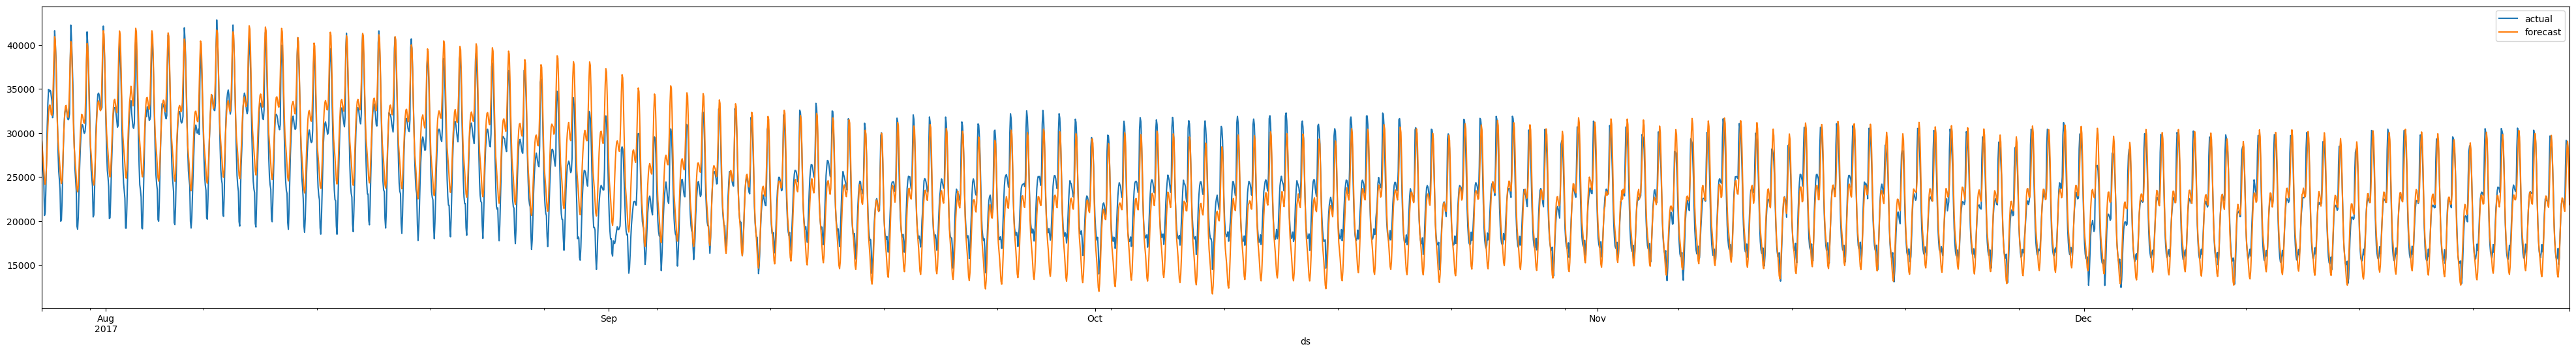

In [38]:
pred_df2=pred_df[['ds','yhat']]
pred_df2=pred_df2.merge(df[['ds','y']],on='ds')
pred_df2=pred_df2[['ds','y','yhat']]
pred_df2.index=pred_df2['ds']
pred_df2.drop('ds',axis=1,inplace=True)
pred_df2.columns=['actual','forecast']
pred_df2.plot(figsize=(50,6))


In [39]:
from sklearn.metrics import mean_absolute_percentage_error 
mean_absolute_percentage_error(pred_df2['actual'],pred_df2['forecast'])

0.07894221823347022

In [40]:
import plotly.graph_objects as go
figure=go.Figure()
figure.add_trace(go.Scatter(y=pred_df2['actual'],name='actual_electricity_consumption'))
figure.add_trace(go.Scatter(y=pred_df2['forecast'],name='prophet_forecast'))